In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam 

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [37]:
labels = ['pond', 'rice_field']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [38]:
import os
path = os.getcwd()
path = path+'\data'
print(path)
train = get_data(path)
val = get_data(path )

F:\All my projects\research\GIS research\data


c:\users\mehedy hasan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


c:\users\mehedy hasan\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

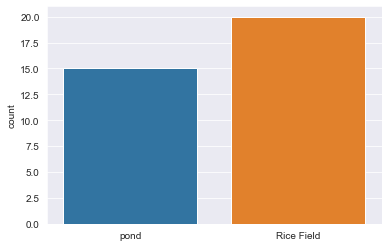

In [39]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("pond")
    else:
        l.append("Rice Field")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'pond')

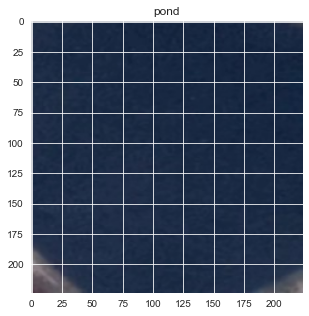

In [40]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'rice_field')

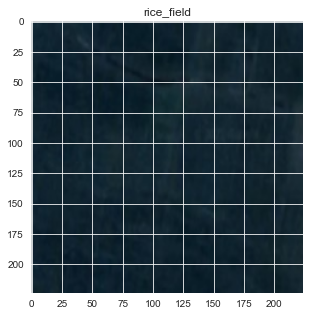

In [41]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [42]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [43]:


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [44]:
datagen.fit(x_train)

In [45]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 28, 28, 64)       

In [46]:
opt = Adam(learning_rate=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

In [47]:
history = model.fit(x_train,y_train,epochs = 5 , validation_data = (x_val, y_val))

Epoch 1/5


c:\users\mehedy hasan\appdata\local\programs\python\python37\lib\site-packages\keras\backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


2/2 [==============================] - 6s 2s/step - loss: 0.6951 - accuracy: 0.5714 - val_loss: 0.6975 - val_accuracy: 0.5714
Epoch 2/5
2/2 [==============================] - 4s 1s/step - loss: 0.6973 - accuracy: 0.5714 - val_loss: 0.6973 - val_accuracy: 0.5714
Epoch 3/5
2/2 [==============================] - 4s 1s/step - loss: 0.6961 - accuracy: 0.5714 - val_loss: 0.6971 - val_accuracy: 0.5714
Epoch 4/5
2/2 [==============================] - 4s 1s/step - loss: 0.6963 - accuracy: 0.5714 - val_loss: 0.6970 - val_accuracy: 0.5714
Epoch 5/5
2/2 [==============================] - 4s 1s/step - loss: 0.7037 - accuracy: 0.5714 - val_loss: 0.6968 - val_accuracy: 0.5714


In [48]:
model.save('my_model.h5')


In [3]:
from imageai.Detection import ObjectDetection
import os

current_directory = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()

detector.setModelPath(os.path.join(current_directory , "my_model.h5"))
detector.loadModel()

detections = detector.detectObjectsFromImage(input_image=os.path.join(current_directory, "image.jpg"), 
                                             output_image_path=os.path.join(current_directory , "traffic_detected.jpg"))

for eachObject in detections:
    print(eachObject["name"] , " : ", eachObject["percentage_probability"], " : ", eachObject["box_points"] )
    print("--------------------------------")

Using TensorFlow backend.


ImportError: cannot import name 'read_image_array' from 'imageai.Detection.keras_retinanet.utils.image' (c:\users\mehedy hasan\appdata\local\programs\python\python37\lib\site-packages\imageai\Detection\keras_retinanet\utils\image.py)